# Electric and hybrid vehicles sales in the European markets in 2016-2018

## This notebook shows how to import data from Excel files located on a remote server, in this case ACEA website, into pandas merge them together and then do further elaboration: calculations, data visualization etc.

## Ideally the initial tasks of data acquistion, extraction and merging could be automated, unfortunately the naming system and the spreadsheet structure of the ACEA official releases varies from file to file. To avoid potential data loss/mixup it's better to process one file at the time in this case.

In [1]:
import pandas as pd


ACEA releases various statistics in form of Excel files with multiple sheets. For example the registration data on "alternative fuel vehicles" include: battery electric vehicles (BEV), plug-in hybrids (PHEV), hybrids (HEV) and also other than electric alternative fuel vehicles.


In [269]:
# file with AFV data for 2017

afv2017_file = 'https://www.acea.be/uploads/press_releases_files/20180201_AFV_Q4_2017_FINAL.XLSX'

In [270]:
# using "sheet_name = None" all the sheets are uploaded

afv_2017 = pd.read_excel(afv2017_file, sheet_name = None)

In [271]:
# from this document we can get total ECV and hybrids

for sheet in afv_2017:
    print(sheet)

BEV
PHEV
Total ECV
HEV
AFV other than electric
Total AFV


In [ ]:
# Electrically chargeable vehicle (ECV) = battery electric vehicles (BEV) + extended‐range electric
# vehicles (EREV) + fuel cell electric vehicles (FCEV) + plug‐in hybrid electric vehicles (PHEV)


### After loading the first sheet ('Total ECV') into pandas it turns out that a number of initial rows are just general text information. It also  turns out that what is really necessary for this analysis are the columns with country names and the 2017 and 2016 sales volumes. The unnecessary rows and columns need to be discarded.


In [272]:
# first rows contain general information, so we start with header = 17, that's 17th row

totalECV_2017 = pd.read_excel(afv2017_file, sheet_name = 'Total ECV', header = 17)

In [273]:
# show the first five rows of the extracted data with .head()

totalECV_2017.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2017,2016,Change,2017.1,2016.1,Change.1,Unnamed: 9
0,NaN,NaN,AUSTRIA,1864.0,1270.0,46.771654,7154.0,5068.0,41.160221,NaN
1,NaN,NaN,BELGIUM,3752.0,2301.0,63.059539,14299.0,8984.0,59.160730,NaN
2,NaN,NaN,BULGARIA,71.0,9.0,688.888889,106.0,13.0,715.384615,NaN
3,NaN,NaN,CZECH REPUBLIC,73.0,70.0,4.285714,307.0,200.0,53.500000,NaN
4,NaN,NaN,DENMARK,731.0,850.0,-14.000000,1342.0,1920.0,-30.104167,NaN


In [274]:
totalECV_2017.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2',         2017,         2016,
           'Change',     '2017.1',     '2016.1',   'Change.1', 'Unnamed: 9'],
      dtype='object')

In [275]:
# dropping the first two columns

totalECV_2017.drop(totalECV_2017.columns[:2], axis = 1, inplace = True)

In [276]:
# columns need to be renamed, and some of them dropped
# the only important columns here are the countries column and full year sales volumes for 2017 and 2016

totalECV_2017.head()

,Unnamed: 2,2017,2016,Change,2017.1,2016.1,Change.1,Unnamed: 9
0,AUSTRIA,1864.0,1270.0,46.771654,7154.0,5068.0,41.160221,NaN
1,BELGIUM,3752.0,2301.0,63.059539,14299.0,8984.0,59.160730,NaN
2,BULGARIA,71.0,9.0,688.888889,106.0,13.0,715.384615,NaN
3,CZECH REPUBLIC,73.0,70.0,4.285714,307.0,200.0,53.500000,NaN
4,DENMARK,731.0,850.0,-14.000000,1342.0,1920.0,-30.104167,NaN


In [278]:
# getting the column indexes

for idx, col in enumerate(totalECV_2017.columns):
    print('index {} : column {}'.format(idx, col))

index 0 : column Unnamed: 2
index 1 : column 2017
index 2 : column 2016
index 3 : column Change
index 4 : column 2017.1
index 5 : column 2016.1
index 6 : column Change.1
index 7 : column Unnamed: 9


In [279]:
# better alternative to dropping columns in this case: reassign only the selected columns, in this case those with indexes 0,4 and 5

totalECV_2017 = totalECV_2017.iloc[:,[0,4,5]] 

In [280]:
totalECV_2017.head()

,Unnamed: 2,2017.1,2016.1
0,AUSTRIA,7154.0,5068.0
1,BELGIUM,14299.0,8984.0
2,BULGARIA,106.0,13.0
3,CZECH REPUBLIC,307.0,200.0
4,DENMARK,1342.0,1920.0



### Columns need to be renamed in a way that will make further merging easy. Naming the 'country' column always in the same way will make it possible to use country names as a key. It is important to keep the country names written always in the same way (e.g. in all capital letters), and check for spelling mistakes and/or additional characters, such as upper indexes indicating some notes, etc.


In [281]:
# rename columns appropriately

col_names = ['country', 'ecv 2017', 'ecv 2016']

totalECV_2017.columns = col_names

In [283]:
totalECV_2017

,country,ecv 2017,ecv 2016
0,AUSTRIA,7154.0,5068.0
1,BELGIUM,14299.0,8984.0
2,BULGARIA,106.0,13.0
3,CZECH REPUBLIC,307.0,200.0
4,DENMARK,1342.0,1920.0
5,ESTONIA,43.0,35.0
6,FINLAND,3055.0,1430.0
7,FRANCE,36835.0,29194.0
8,GERMANY,54617.0,25214.0
9,GREECE,199.0,43.0


In [282]:
# only the rows from 0 to 23 and rows 27, 28 are necessary

good_rows = [row for row in range(24)] + [27,28]

In [284]:
totalECV_2017 = totalECV_2017.loc[good_rows]

In [286]:
totalECV_2017.head()

,country,ecv 2017,ecv 2016
0,AUSTRIA,7154.0,5068.0
1,BELGIUM,14299.0,8984.0
2,BULGARIA,106.0,13.0
3,CZECH REPUBLIC,307.0,200.0
4,DENMARK,1342.0,1920.0



## It can be seen right away that the sales figures of the ECVs in most cases grew from 2016 to 2017, but to put these into proportion we need the total passenger cars sales volumes. 

### The overall sales volumes files have a different structure than the AFV data: they contain not only passenger cars but also commercial vehicles from light to heavy, and are more detailed, with volumes split by month.


In [287]:
# all motor vehicles sales in 2017

sales2017_file = 'https://www.acea.be/uploads/statistic_documents/2017_by_country_and_type_Enlarged_Europe_prov_.xlsx'

In [288]:
# using "sheet_name = None" all the sheets are uploaded

sales_2017 = pd.read_excel(sales2017_file, sheet_name = None)

In [289]:
# from this document we can get total passenger cars 'PC (2)'

for sheet in sales_2017:
    print(sheet)

INDEX
MV (1)
PC (2)
LCV (3)
LBC (4)
LCV + LBC (5)
MCV (6)
MBC (7)
MCV + MBC (8)
HCV (9)
HBC (10)
HCV + HBC (11)


In [290]:
# first rows contain general information, so we start with header = 17, that's 17th row

sales_pc_2017 = pd.read_excel(sales2017_file, sheet_name = 'PC (2)')

In [291]:
# show the first five rows of the extracted data with .head()
# this file has a different structure: sales volumes for each month are in columns 1 to 12
# we just need column 13 with full year volumes

sales_pc_2017.head()

,New registrations in European Union and EFTA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,2017-01-01 00:00:00,2017-02-01 00:00:00,2017-03-01 00:00:00,2017-04-01 00:00:00,2017-05-01 00:00:00,2017-06-01 00:00:00,2017-07-01 00:00:00,2017-08-01 00:00:00,2017-09-01 00:00:00,2017-10-01 00:00:00,2017-11-01 00:00:00,2017-12-01 00:00:00,FY
2,Passenger cars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,26352,25311,36830,30201,32426,35441,27731,26058,29528,28244,29547,25651,353320
4,Belgium,51701,51942,61066,51132,51342,55119,36627,35517,40895,43500,39645,28072,546558


In [292]:
sales_pc_2017 = sales_pc_2017.iloc[:, [0,13]]

In [293]:
sales_pc_2017.head()

,New registrations in European Union and EFTA,Unnamed: 13
0,NaN,NaN
1,Country,FY
2,Passenger cars,NaN
3,Austria,353320
4,Belgium,546558


In [294]:
sales_pc_2017.columns = ['country', 'passcars 2017']

In [295]:
sales_pc_2017.head()

,country,passcars 2017
0,NaN,NaN
1,Country,FY
2,Passenger cars,NaN
3,Austria,353320
4,Belgium,546558


In [296]:
# get indexes of rows to find out which need to be discarded

for idx, country in enumerate(sales_pc_2017['country'].unique()):
    print(idx, country)

0 nan
1 Country
2 Passenger cars
3 Austria
4 Belgium
5 Bulgaria
6 Croatia
7 Czech Republic
8 Denmark
9 Estonia
10 Finland
11 France
12 Germany
13 Greece
14 Hungary
15 Ireland
16 Italy
17 Latvia
18 Lithuania
19 Luxembourg
20 Netherlands
21 Poland
22 Portugal
23 Romania1
24 Slovakia
25 Slovenia
26 Spain
27 Sweden
28 United Kingdom
29 EUROPEAN UNION
30 Iceland
31 Norway
32 Switzerland
33 EFTA
34 EU15 + EFTA
35 EU + EFTA
36 Source: Association Auxiliaire de l'Automobile
37 1Data for Romania refers to sales (APIA). For registrations, see ACAROM figures at www.acea.be


In [297]:
idxs = [idx for idx in range(3,29)] + [30,31,32]

sales_pc_2017 = sales_pc_2017.iloc[idxs,:]

In [298]:
# make all country names uppercase

sales_pc_2017['country'] = sales_pc_2017['country'].apply(lambda s: s.upper())

In [300]:
sales_pc_2017.columns

Index(['country', 'passcars 2017'], dtype='object')

In [301]:
sales_pc_2017['country'].unique()

array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CZECH REPUBLIC',
       'DENMARK', 'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE',
       'HUNGARY', 'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'LUXEMBOURG',
       'NETHERLANDS', 'POLAND', 'PORTUGAL', 'ROMANIA1', 'SLOVAKIA',
       'SLOVENIA', 'SPAIN', 'SWEDEN', 'UNITED KINGDOM', 'ICELAND',
       'NORWAY', 'SWITZERLAND'], dtype=object)

In [302]:
# because of the upper index 'ROMANIA1' and 'ROMANIA' wouldn't match

sales_pc_2017['country'] = sales_pc_2017['country'].apply(lambda s: s.replace('ROMANIA1', 'ROMANIA'))

In [303]:
totalECV_2017['country'].unique()

array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CZECH REPUBLIC', 'DENMARK',
       'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY',
       'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'NETHERLANDS', 'POLAND',
       'PORTUGAL ', 'ROMANIA', 'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN',
       'UNITED KINGDOM', 'NORWAY', 'SWITZERLAND'], dtype=object)

In [304]:
# same with 'PORTUGAL ' and 'PORTUGAL'

totalECV_2017['country'] = totalECV_2017['country'].apply(lambda s: s.replace('PORTUGAL ', 'PORTUGAL'))

In [305]:
# country names fixed
# Croatia, Luxembourg and Iceland don't have ECV data available

data = pd.merge(sales_pc_2017, totalECV_2017, how = 'outer', on = 'country')

In [306]:
data.head()

,country,passcars 2017,ecv 2017,ecv 2016
0,AUSTRIA,353320,7154.0,5068.0
1,BELGIUM,546558,14299.0,8984.0
2,BULGARIA,33809,106.0,13.0
3,CROATIA,50770,NaN,NaN
4,CZECH REPUBLIC,271595,307.0,200.0



### In an attempt to get the data programmatically I got all the links to the overall sales volumes files. These could be used to get the data, but the differences between the files make the result quite unpredictable. As I only need data from the last three years, it's simpler to get them one by one


In [50]:
# extracting all the links to sales volumes by countr

url = 'https://www.acea.be/statistics/tag/category/by-country-registrations'

In [307]:
import requests

In [308]:
acea = requests.get(url)

In [309]:
import re

In [310]:
# all the unique links to files

links = set(re.findall('([\w-]+.xls\w?)', str(acea.content)))
print(len(links))
print(links)

22
{'20090407_1997_By_Country_Western_Europe.xls', '20090407_2003_By_Country_Enlarged_Europe.xls', '20111014_02_2010_vo_By_Country_Enlarged_Europe.xls', '20090407_2002_By_Country_Western_Europe.xls', '170216_2015_by_country_and_type_Enlarged_Europe.xlsx', '20090407_1999_By_Country_Western_Europe.xls', '2016_by_country_and_type_Enlarged_Europe_final_.xlsx', '20090407_2000_By_Country_Western_Europe.xls', '20090407_2007_By_Country_Enlarged_Europe.xls', '2017_by_country_and_type_Enlarged_Europe_prov_.xlsx', 'PC_90-17_by_country_Enlarged_Europe.xlsx', '20090407_2001_By_Country_Western_Europe.xls', '20090407_1998_By_Country_Western_Europe.xls', '20110221_02_2009_vo_By_Country_Enlarged_Europe.xls', '20090407_2006_By_Country_Enlarged_Europe.xls', '20090407_2004_By_Country_Enlarged_Europe.xls', '20090407_2005_By_Country_Enlarged_Europe.xls', '20150219_2013_vo_By_Country_Enlarged_Europe.xlsx', '20100129_02_2008_vo_By_Country_Enlarged_Europe.xls', '20120521_02_2011_vo_By_Country_Enlarged_Europe_f

In [311]:
# exclude the PC_90-17 multiyear file

links = [link for link in links if not link.startswith('PC')]

In [312]:
links

['20090407_1997_By_Country_Western_Europe.xls',
 '20090407_2003_By_Country_Enlarged_Europe.xls',
 '20111014_02_2010_vo_By_Country_Enlarged_Europe.xls',
 '20090407_2002_By_Country_Western_Europe.xls',
 '170216_2015_by_country_and_type_Enlarged_Europe.xlsx',
 '20090407_1999_By_Country_Western_Europe.xls',
 '2016_by_country_and_type_Enlarged_Europe_final_.xlsx',
 '20090407_2000_By_Country_Western_Europe.xls',
 '20090407_2007_By_Country_Enlarged_Europe.xls',
 '2017_by_country_and_type_Enlarged_Europe_prov_.xlsx',
 '20090407_2001_By_Country_Western_Europe.xls',
 '20090407_1998_By_Country_Western_Europe.xls',
 '20110221_02_2009_vo_By_Country_Enlarged_Europe.xls',
 '20090407_2006_By_Country_Enlarged_Europe.xls',
 '20090407_2004_By_Country_Enlarged_Europe.xls',
 '20090407_2005_By_Country_Enlarged_Europe.xls',
 '20150219_2013_vo_By_Country_Enlarged_Europe.xlsx',
 '20100129_02_2008_vo_By_Country_Enlarged_Europe.xls',
 '20120521_02_2011_vo_By_Country_Enlarged_Europe_format.xls',
 '20140211_02_201

In [313]:
full_links = []

for link in links:
    full_link = 'https://www.acea.be/uploads/statistic_documents/{}'.format(link)
    full_links.append(full_link)
    
for index, link in enumerate(full_links):
    print(index, ' ', link)


0   https://www.acea.be/uploads/statistic_documents/20090407_1997_By_Country_Western_Europe.xls
1   https://www.acea.be/uploads/statistic_documents/20090407_2003_By_Country_Enlarged_Europe.xls
2   https://www.acea.be/uploads/statistic_documents/20111014_02_2010_vo_By_Country_Enlarged_Europe.xls
3   https://www.acea.be/uploads/statistic_documents/20090407_2002_By_Country_Western_Europe.xls
4   https://www.acea.be/uploads/statistic_documents/170216_2015_by_country_and_type_Enlarged_Europe.xlsx
5   https://www.acea.be/uploads/statistic_documents/20090407_1999_By_Country_Western_Europe.xls
6   https://www.acea.be/uploads/statistic_documents/2016_by_country_and_type_Enlarged_Europe_final_.xlsx
7   https://www.acea.be/uploads/statistic_documents/20090407_2000_By_Country_Western_Europe.xls
8   https://www.acea.be/uploads/statistic_documents/20090407_2007_By_Country_Enlarged_Europe.xls
9   https://www.acea.be/uploads/statistic_documents/2017_by_country_and_type_Enlarged_Europe_prov_.xlsx
10   


### Back to getting the data:


In [314]:
# all motor vehicles sales in 2016

sales2016_file = full_links[6]

print(sales2016_file)

https://www.acea.be/uploads/statistic_documents/2016_by_country_and_type_Enlarged_Europe_final_.xlsx


In [315]:
# using "sheet_name = None" all the sheets are uploaded

sales_2016 = pd.read_excel(sales2016_file, sheet_name = None)

In [316]:
# from this document we can get total passenger cars 'PC (2)'

for sheet in sales_2016:
    print(sheet)

INDEX
MV (1)
PC (2)
LCV (3)
LBC (4)
LCV + LBC (5)
MCV (6)
MBC (7)
MCV + MBC (8)
HCV (9)
HBC (10)
HCV + HBC (11)


In [317]:
# first rows contain general information, so we start with header = 17, that's 17th row

sales_pc_2016 = pd.read_excel(sales2016_file, sheet_name = 'PC (2)')

In [318]:
# show the first five rows of the extracted data with .head()
# this file has a different structure: sales volumes for each month are in columns 1 to 12
# we just need column 13 with full year volumes

sales_pc_2016.head()

,New registrations in European Union and EFTA,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Country,2016-01-01 00:00:00,2016-02-01 00:00:00,2016-03-01 00:00:00,2016-04-01 00:00:00,2016-05-01 00:00:00,2016-06-01 00:00:00,2016-07-01 00:00:00,2016-08-01 00:00:00,2016-09-01 00:00:00,2016-10-01 00:00:00,2016-11-01 00:00:00,2016-12-01 00:00:00,FY
2,Passenger cars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austria,24019,22495,31941,31102,28462,33751,26882,23690,29836,26273,25491,25662,329604
4,Belgium,44326,49707,56423,55022,48856,55272,34373,38655,41748,41969,39645,33523,539519


In [319]:
sales_pc_2016 = sales_pc_2016.iloc[:, [0,13]]

In [320]:
sales_pc_2016.head()

,New registrations in European Union and EFTA,Unnamed: 13
0,NaN,NaN
1,Country,FY
2,Passenger cars,NaN
3,Austria,329604
4,Belgium,539519


In [321]:
sales_pc_2016.columns = ['country', 'passcars 2016']

In [322]:
sales_pc_2016.head()

,country,passcars 2016
0,NaN,NaN
1,Country,FY
2,Passenger cars,NaN
3,Austria,329604
4,Belgium,539519


In [323]:
# get indexes of rows to find out which need to be discarded

for idx, country in enumerate(sales_pc_2016['country'].unique()):
    print(idx, country)

0 nan
1 Country
2 Passenger cars
3 Austria
4 Belgium
5 Bulgaria
6 Croatia
7 Czech Republic
8 Denmark
9 Estonia
10 Finland
11 France
12 Germany
13 Greece
14 Hungary
15 Ireland
16 Italy
17 Latvia
18 Lithuania
19 Luxembourg
20 Netherlands
21 Poland
22 Portugal
23 Romania1
24 Slovakia
25 Slovenia
26 Spain
27 Sweden
28 United Kingdom
29 EUROPEAN UNION
30 Iceland
31 Norway
32 Switzerland
33 EFTA
34 EU15 + EFTA
35 EU + EFTA
36 Source: Association Auxiliaire de l'Automobile
37 1Data for Romania refers to sales (APIA). For registrations, see ACAROM figures at www.acea.be


In [324]:
idxs = [idx for idx in range(3,29)] + [30,31,32]

sales_pc_2016 = sales_pc_2016.iloc[idxs,:]

In [325]:
# make all country names uppercase

sales_pc_2016['country'] = sales_pc_2016['country'].apply(lambda s: s.upper())

In [326]:
sales_pc_2016['country'].unique()

array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CZECH REPUBLIC',
       'DENMARK', 'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE',
       'HUNGARY', 'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'LUXEMBOURG',
       'NETHERLANDS', 'POLAND', 'PORTUGAL', 'ROMANIA1', 'SLOVAKIA',
       'SLOVENIA', 'SPAIN', 'SWEDEN', 'UNITED KINGDOM', 'ICELAND',
       'NORWAY', 'SWITZERLAND'], dtype=object)

In [327]:
sales_pc_2016['country'] = sales_pc_2016['country'].apply(lambda s: s.replace('ROMANIA1', 'ROMANIA'))

In [328]:
data = pd.merge(data, sales_pc_2016, how = 'outer', on = 'country')

In [329]:
data.head()

,country,passcars 2017,ecv 2017,ecv 2016,passcars 2016
0,AUSTRIA,353320,7154.0,5068.0,329604
1,BELGIUM,546558,14299.0,8984.0,539519
2,BULGARIA,33809,106.0,13.0,28216
3,CROATIA,50770,NaN,NaN,44106
4,CZECH REPUBLIC,271595,307.0,200.0,259693



## To get a better picture it makes sense to add the hybrid vehicles, too. 


In [332]:
# first rows contain general information, so we start with header = 17, that's 17th row

HEV_2017 = pd.read_excel(afv2017_file, sheet_name = 'HEV', header = 17)

In [334]:
# show the first five rows of the extracted data with .head()

HEV_2017.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2017,2016,Change,2017.1,2016.1,Change.1,Unnamed: 9
0,NaN,NaN,AUSTRIA,1673.0,1062.0,57.532957,6572.0,3474.0,89.176742,NaN
1,NaN,NaN,BELGIUM,2462.0,2348.0,4.855196,12571.0,9501.0,32.312388,NaN
2,NaN,NaN,BULGARIA,412.0,258.0,59.689922,1195.0,580.0,106.034483,NaN
3,NaN,NaN,CZECH REPUBLIC,787.0,461.0,70.715835,2826.0,1541.0,83.387411,NaN
4,NaN,NaN,DENMARK,1513.0,1377.0,9.876543,7101.0,6781.0,4.719068,NaN


In [335]:
HEV_2017.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2',         2017,         2016,
           'Change',     '2017.1',     '2016.1',   'Change.1', 'Unnamed: 9'],
      dtype='object')

In [336]:
# dropping the first two columns

HEV_2017.drop(HEV_2017.columns[:2], axis = 1, inplace = True)

In [337]:
# columns need to be renamed, and some of them dropped
# the only important columns here are the countries column and full year sales volumes for 2017 and 2016

HEV_2017.head()

,Unnamed: 2,2017,2016,Change,2017.1,2016.1,Change.1,Unnamed: 9
0,AUSTRIA,1673.0,1062.0,57.532957,6572.0,3474.0,89.176742,NaN
1,BELGIUM,2462.0,2348.0,4.855196,12571.0,9501.0,32.312388,NaN
2,BULGARIA,412.0,258.0,59.689922,1195.0,580.0,106.034483,NaN
3,CZECH REPUBLIC,787.0,461.0,70.715835,2826.0,1541.0,83.387411,NaN
4,DENMARK,1513.0,1377.0,9.876543,7101.0,6781.0,4.719068,NaN


In [338]:
# getting the column indexes

for idx, col in enumerate(HEV_2017.columns):
    print('index {} : column {}'.format(idx, col))

index 0 : column Unnamed: 2
index 1 : column 2017
index 2 : column 2016
index 3 : column Change
index 4 : column 2017.1
index 5 : column 2016.1
index 6 : column Change.1
index 7 : column Unnamed: 9


In [339]:
# better alternative to dropping columns in this case: reassign only the selected columns, in this case those with indexes 0,4 and 5

HEV_2017 = HEV_2017.iloc[:,[0,4,5]] 

In [340]:
HEV_2017.head()

,Unnamed: 2,2017.1,2016.1
0,AUSTRIA,6572.0,3474.0
1,BELGIUM,12571.0,9501.0
2,BULGARIA,1195.0,580.0
3,CZECH REPUBLIC,2826.0,1541.0
4,DENMARK,7101.0,6781.0


In [341]:
# rename columns appropriately

col_names = ['country', 'hev 2017', 'hev 2016']

HEV_2017.columns = col_names

In [342]:
HEV_2017

,country,hev 2017,hev 2016
0,AUSTRIA,6572.0,3474.0
1,BELGIUM,12571.0,9501.0
2,BULGARIA,1195.0,580.0
3,CZECH REPUBLIC,2826.0,1541.0
4,DENMARK,7101.0,6781.0
5,ESTONIA,1188.0,765.0
6,FINLAND,8514.0,4678.0
7,FRANCE,69680.0,50956.0
8,GERMANY,55236.0,34245.0
9,GREECE,2348.0,1545.0


In [343]:
# only the rows from 0 to 23 and rows 27, 28 are necessary

good_rows = [row for row in range(24)] + [27,28]

In [344]:
HEV_2017 = HEV_2017.loc[good_rows]

In [345]:
HEV_2017['country'].unique()

array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CZECH REPUBLIC', 'DENMARK',
       'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY',
       'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'NETHERLANDS', 'POLAND',
       'PORTUGAL ', 'ROMANIA', 'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN',
       'UNITED KINGDOM', 'NORWAY', 'SWITZERLAND'], dtype=object)

In [346]:
HEV_2017['country'] = HEV_2017['country'].apply(lambda s: s.replace('PORTUGAL ', 'PORTUGAL'))

In [348]:
data = data.merge(HEV_2017, how = 'outer', on = 'country')

In [349]:
data.head()

,country,passcars 2017,ecv 2017,ecv 2016,passcars 2016,hev 2017,hev 2016
0,AUSTRIA,353320,7154.0,5068.0,329604,6572.0,3474.0
1,BELGIUM,546558,14299.0,8984.0,539519,12571.0,9501.0
2,BULGARIA,33809,106.0,13.0,28216,1195.0,580.0
3,CROATIA,50770,NaN,NaN,44106,NaN,NaN
4,CZECH REPUBLIC,271595,307.0,200.0,259693,2826.0,1541.0



### Time to get the 2018 data:


In [351]:
# official ACEA statistics on 'alternative fuel vehicles', including BEV, PHEV, Hybrid and other non-electric alt fuels 

afv2018_file = 'http://www.acea.be/uploads/press_releases_files/20190207_PRPC_fuel_Q4_2018_FINAL.xlsx'

In [352]:
# using "sheet_name = None" all the sheets are uploaded

afv_2018 = pd.read_excel(afv2018_file, sheet_name = None)

In [355]:
pd.read_excel(afv2018_file, sheet_name='Total ECV')

,Unnamed: 0,Unnamed: 1,Unnamed: 2,P R E S S R E L E A S E,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,PRESS EMBARGO FOR ALL DATA:\n8.00 AM (7.00 AM ...,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,TOTAL ELECTRIC CHARGEABLE VEHICLES (ECV)1,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NEW PASSENGER CAR REGISTRATIONS BY MARKET IN T...,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### This was an attempt to do at least some work programmatically. In this case it could probably work although it's hard to predict, without checking each file separately, whether the same rows and/or columns need to be dropped. In the end I did it manually


In [ ]:
# nice try but can't work very well: each file has the data start at a different row

col_dict = {'Total ECV':'ecv', 'HEV':'hev'}


for cars in ['Total ECV', 'HEV']:
    df = pd.read_excel(afv2018_file, sheet_name=cars, header = 16)
    df.drop(df.columns[:2], axis = 1, inplace = True)
    df = df.iloc[:,[0,4,5]] 
    col_names = ['country', '{} 2018'.format(col_dict[cars]), '{} 2017'.format(col_dict[cars])]
    df.columns = col_names
    good_rows = [row for row in range(24)] + [27,28]
    df = df.loc[good_rows]
    df['country'] = df['country'].apply(lambda s: s.replace('PORTUGAL ', 'PORTUGAL'))
    df['country'] = df['country'].apply(lambda s: s.replace('ROMANIA1', 'ROMANIA'))
    df['country'] = df['country'].apply(lambda s: s.replace('LITHUANIA1', 'LITHUANIA'))
    
    data = data.merge(df, how = 'outer', on = 'country')


### In the end I did it manually, one file after another.


In [371]:
# first rows contain general information, so we start with header = 16, that's 16th row

hev2018 = pd.read_excel(afv2018_file, sheet_name = 'HEV', header = 16)

In [372]:
# show the first five rows of the extracted data with .head()

hev2018.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2018,2017,Change,2018.1,2017.1,Change.1,Unnamed: 9
0,NaN,NaN,AUSTRIA,1750.0,1673.0,4.602510,7513.0,6572.0,14.318320,NaN
1,NaN,NaN,BELGIUM,3377.0,2462.0,37.164907,15165.0,12411.0,22.189993,NaN
2,NaN,NaN,BULGARIA,497.0,412.0,20.631068,1600.0,1195.0,33.891213,NaN
3,NaN,NaN,CZECH REPUBLIC,1480.0,787.0,88.055909,4553.0,2826.0,61.111111,NaN
4,NaN,NaN,DENMARK,2130.0,1513.0,40.779907,8716.0,7104.0,22.691441,NaN


In [373]:
hev2018.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2',         2018,         2017,
           'Change',     '2018.1',     '2017.1',   'Change.1', 'Unnamed: 9'],
      dtype='object')

In [375]:
# keeping just the columns 2, 6 and 7:

hev2018 = hev2018.iloc[:, [2,6,7]]

In [376]:
# columns need to be renamed, and some of them dropped
# the only important columns here are the countries column and full year sales volumes for 2017 and 2016

hev2018.columns = ['country', 'hev 2018', 'hev 2017']

In [377]:
hev2018.head()

,country,hev 2018,hev 2017
0,AUSTRIA,7513.0,6572.0
1,BELGIUM,15165.0,12411.0
2,BULGARIA,1600.0,1195.0
3,CZECH REPUBLIC,4553.0,2826.0
4,DENMARK,8716.0,7104.0


In [379]:
for idx, country in enumerate(hev2018['country']):
    print(idx, country)

0 AUSTRIA
1 BELGIUM
2 BULGARIA
3 CZECH REPUBLIC
4 DENMARK
5 ESTONIA
6 FINLAND
7 FRANCE
8 GERMANY
9 GREECE
10 HUNGARY
11 IRELAND
12 ITALY
13 LATVIA
14 LITHUANIA
15 NETHERLANDS
16 POLAND
17 PORTUGAL 
18 ROMANIA
19 SLOVAKIA
20 SLOVENIA
21 SPAIN
22 SWEDEN
23 UNITED KINGDOM
24 EUROPEAN UNION
25 EU15
26 EU (New Members)
27 NORWAY
28 SWITZERLAND
29 EFTA
30 EU + EFTA
31 EU15 + EFTA
32 SOURCE: NATIONAL AUTOMOBILE MANUFACTURERS' ASSOCIATIONS 
33 1Includes full and mild hybrids
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 This information is available on the ACEA website: http://www.acea.be
48 nan
49 nan
50 nan
51 nan


In [380]:
# only the rows from 0 to 23 and rows 27, 28 are necessary

good_rows = [row for row in range(24)] + [27,28]

In [381]:
hev2018 = hev2018.loc[good_rows]

In [383]:
hev2018['country'].unique()

array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CZECH REPUBLIC', 'DENMARK',
       'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY',
       'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'NETHERLANDS', 'POLAND',
       'PORTUGAL ', 'ROMANIA', 'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN',
       'UNITED KINGDOM', 'NORWAY', 'SWITZERLAND'], dtype=object)

In [384]:
hev2018['country'] = hev2018['country'].apply(lambda s: s.replace('PORTUGAL ', 'PORTUGAL'))

In [385]:
data = data.merge(hev2018, how = 'outer', on = 'country')


In [386]:
# there are some small differences between the 2017 data in the 2017/2016 and the 2018/2017 files: using the newer data from 2018

data.head()

,country,passcars 2017,ecv 2017,ecv 2016,passcars 2016,hev 2017_x,hev 2016,hev 2018,hev 2017_y
0,AUSTRIA,353320,7154.0,5068.0,329604,6572.0,3474.0,7513.0,6572.0
1,BELGIUM,546558,14299.0,8984.0,539519,12571.0,9501.0,15165.0,12411.0
2,BULGARIA,33809,106.0,13.0,28216,1195.0,580.0,1600.0,1195.0
3,CROATIA,50770,NaN,NaN,44106,NaN,NaN,NaN,NaN
4,CZECH REPUBLIC,271595,307.0,200.0,259693,2826.0,1541.0,4553.0,2826.0


In [387]:
data.drop('hev 2017_x', axis = 1, inplace=True)

In [388]:
data = data.rename(columns={'hev 2017_y':'hev 2017'})

In [389]:
# at this point the ecv/hev shares and year to year changes must be recalculated

data.head()

,country,passcars 2017,ecv 2017,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017
0,AUSTRIA,353320,7154.0,5068.0,329604,3474.0,7513.0,6572.0
1,BELGIUM,546558,14299.0,8984.0,539519,9501.0,15165.0,12411.0
2,BULGARIA,33809,106.0,13.0,28216,580.0,1600.0,1195.0
3,CROATIA,50770,NaN,NaN,44106,NaN,NaN,NaN
4,CZECH REPUBLIC,271595,307.0,200.0,259693,1541.0,4553.0,2826.0



### The 2018 overall sales volumes file has a different structure from the 2016 and 2017. Actually it is not yet the final file, it seems, but rather a December 2018 file where the full year 2018 data can be found. 


In [390]:
# all motor vehicles sales in 2018

sales2018_file = 'http://www.acea.be/uploads/press_releases_files/20190115_PRPC_1812_FINAL.xlsx'


In [391]:
# using "sheet_name = None" all the sheets are uploaded

sales_2018 = pd.read_excel(sales2018_file, sheet_name = None)

In [392]:
# from this document we can get total passenger cars

for sheet in sales_2018:
    print(sheet)

By Market
By Manufacturer EU28
By Manufacturer Total
By Manufacturer Western Europe


In [393]:
# first rows contain general information, so we start with header = 17, that's 17th row

sales_pc_2018 = pd.read_excel(sales2018_file, sheet_name = 'By Market')

In [395]:
# we just need columns 2, 6 and 7 with full year volumes

sales_pc_2018.head(15)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,P R E S S R E L E A S E,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,PRESS EMBARGO FOR ALL DATA:,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,"8.00 AM (7.00 AM GMT), 16 January 2019",NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,PROVISIONAL,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NEW PASSENGER CAR REGISTRATIONS BY MARKET,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,EUROPEAN UNION1,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-16 00:00:00,NaN
9,NaN,NaN,NaN,December,December,%Change,Jan-Dec,Jan-Dec,%Change,NaN


In [396]:
sales_pc_2018 = sales_pc_2018.iloc[:, [2,6,7]]

In [397]:
sales_pc_2018.head()

,Unnamed: 2,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [398]:
sales_pc_2018.columns = ['country', 'passcars 2018', 'passcars 2017']

In [399]:
# get indexes of rows to find out which need to be discarded

for idx, country in enumerate(sales_pc_2018['country']):
    print(idx, country)

0 nan
1 nan
2 nan
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 AUSTRIA
12 BELGIUM
13 BULGARIA
14 CROATIA
15 CYPRUS
16 CZECH REPUBLIC
17 DENMARK
18 ESTONIA
19 FINLAND
20 FRANCE
21 GERMANY
22 GREECE
23 HUNGARY
24 IRELAND
25 ITALY
26 LATVIA
27 LITHUANIA2
28 LUXEMBOURG
29 NETHERLANDS
30 POLAND
31 PORTUGAL
32 ROMANIA
33 SLOVAKIA
34 SLOVENIA
35 SPAIN
36 SWEDEN
37 UNITED KINGDOM
38 EUROPEAN UNION
39 EU153
40 EU124
41 ICELAND
42 NORWAY
43 SWITZERLAND
44 EFTA
45 EU + EFTA
46 EU15 + EFTA
47 SOURCE: NATIONAL AUTOMOBILE MANUFACTURERS' ASSOCIATIONS 
48 1Data for Malta n.a.
49 2Estimates
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 Next press release: Friday 15 February 2019
68 This information is available on the ACEA website: http://www.acea.be
69 nan


In [400]:
idxs = [idx for idx in range(11,38)] + [41,42,43]

sales_pc_2018 = sales_pc_2018.iloc[idxs,:]

In [401]:
sales_pc_2018['country'].unique()

array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CROATIA', 'CYPRUS',
       'CZECH REPUBLIC', 'DENMARK', 'ESTONIA', 'FINLAND', 'FRANCE',
       'GERMANY', 'GREECE', 'HUNGARY', 'IRELAND', 'ITALY', 'LATVIA',
       'LITHUANIA2', 'LUXEMBOURG', 'NETHERLANDS', 'POLAND', 'PORTUGAL',
       'ROMANIA', 'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN',
       'UNITED KINGDOM', 'ICELAND', 'NORWAY', 'SWITZERLAND'], dtype=object)

In [402]:
sales_pc_2018['country'] = sales_pc_2018['country'].apply(lambda s: s.replace('LITHUANIA2', 'LITHUANIA'))

In [403]:
# outer merge to keep all the countries


data = data.merge(sales_pc_2018, how = 'outer', on = 'country')

In [404]:
# similar situation with car sales 2017: dropping the older data column

data.head()

,country,passcars 2017_x,ecv 2017,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017,passcars 2018,passcars 2017_y
0,AUSTRIA,353320,7154.0,5068.0,329604,3474.0,7513.0,6572.0,341068,353320
1,BELGIUM,546558,14299.0,8984.0,539519,9501.0,15165.0,12411.0,549632,546558
2,BULGARIA,33809,106.0,13.0,28216,580.0,1600.0,1195.0,34332,31244
3,CROATIA,50770,NaN,NaN,44106,NaN,NaN,NaN,59856,50412
4,CZECH REPUBLIC,271595,307.0,200.0,259693,1541.0,4553.0,2826.0,261437,271595


In [405]:
data.drop('passcars 2017_x', axis = 1, inplace = True)
data = data.rename(columns = {'passcars 2017_y':'passcars 2017'})

In [406]:
data.head()

,country,ecv 2017,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017,passcars 2018,passcars 2017
0,AUSTRIA,7154.0,5068.0,329604,3474.0,7513.0,6572.0,341068,353320
1,BELGIUM,14299.0,8984.0,539519,9501.0,15165.0,12411.0,549632,546558
2,BULGARIA,106.0,13.0,28216,580.0,1600.0,1195.0,34332,31244
3,CROATIA,NaN,NaN,44106,NaN,NaN,NaN,59856,50412
4,CZECH REPUBLIC,307.0,200.0,259693,1541.0,4553.0,2826.0,261437,271595


In [408]:
# first rows contain general information, so we start with header = 16, that's 16th row

ecv2018 = pd.read_excel(afv2018_file, sheet_name = 'Total ECV', header = 16)

In [409]:
# show the first five rows of the extracted data with .head()

ecv2018.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,2018,2017,Change,2018.1,2017.1,Change.1,Unnamed: 9
0,NaN,NaN,AUSTRIA,2527.0,1864.0,35.568670,8652.0,7154.0,20.939335,NaN
1,NaN,NaN,BELGIUM,2845.0,3752.0,-24.173774,13353.0,14459.0,-7.649215,NaN
2,NaN,NaN,BULGARIA,87.0,71.0,22.535211,220.0,106.0,107.547170,NaN
3,NaN,NaN,CZECH REPUBLIC,281.0,93.0,202.150538,981.0,387.0,153.488372,NaN
4,NaN,NaN,DENMARK,1098.0,721.0,52.288488,4679.0,1334.0,250.749625,NaN


In [410]:
ecv2018.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2',         2018,         2017,
           'Change',     '2018.1',     '2017.1',   'Change.1', 'Unnamed: 9'],
      dtype='object')

In [411]:
# keeping just the columns 2, 6 and 7:

ecv2018 = ecv2018.iloc[:, [2,6,7]]

In [412]:
# columns need to be renamed, and some of them dropped
# the only important columns here are the countries column and full year sales volumes for 2017 and 2016

ecv2018.columns = ['country', 'ecv 2018', 'ecv 2017']

In [413]:
ecv2018.head()

,country,ecv 2018,ecv 2017
0,AUSTRIA,8652.0,7154.0
1,BELGIUM,13353.0,14459.0
2,BULGARIA,220.0,106.0
3,CZECH REPUBLIC,981.0,387.0
4,DENMARK,4679.0,1334.0


In [414]:
for idx, country in enumerate(ecv2018['country']):
    print(idx, country)

0 AUSTRIA
1 BELGIUM
2 BULGARIA
3 CZECH REPUBLIC
4 DENMARK
5 ESTONIA
6 FINLAND
7 FRANCE
8 GERMANY
9 GREECE
10 HUNGARY
11 IRELAND
12 ITALY
13 LATVIA
14 LITHUANIA
15 NETHERLANDS
16 POLAND
17 PORTUGAL 
18 ROMANIA
19 SLOVAKIA
20 SLOVENIA
21 SPAIN
22 SWEDEN
23 UNITED KINGDOM
24 EUROPEAN UNION
25 EU15
26 EU (New Members)
27 NORWAY
28 SWITZERLAND
29 EFTA
30 EU + EFTA
31 EU15 + EFTA
32 SOURCE: NATIONAL AUTOMOBILE MANUFACTURERS' ASSOCIATIONS 
33 1ECV = BEV + FCEV + PHEV + EREV
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 This information is available on the ACEA website: http://www.acea.be
48 nan
49 nan
50 nan
51 nan
52 nan


In [415]:
# only the rows from 0 to 23 and rows 27, 28 are necessary

good_rows = [row for row in range(24)] + [27,28]

In [416]:
ecv2018 = ecv2018.loc[good_rows]

In [417]:
ecv2018['country'].unique()

array(['AUSTRIA', 'BELGIUM', 'BULGARIA', 'CZECH REPUBLIC', 'DENMARK',
       'ESTONIA', 'FINLAND', 'FRANCE', 'GERMANY', 'GREECE', 'HUNGARY',
       'IRELAND', 'ITALY', 'LATVIA', 'LITHUANIA', 'NETHERLANDS', 'POLAND',
       'PORTUGAL ', 'ROMANIA', 'SLOVAKIA', 'SLOVENIA', 'SPAIN', 'SWEDEN',
       'UNITED KINGDOM', 'NORWAY', 'SWITZERLAND'], dtype=object)

In [418]:
ecv2018['country'] = ecv2018['country'].apply(lambda s: s.replace('PORTUGAL ', 'PORTUGAL'))

In [419]:
data = data.merge(ecv2018, how = 'outer', on = 'country')


In [420]:
# there are some small differences between the 2017 data in the 2017/2016 and the 2018/2017 files: using the newer data from 2018

data.head()

,country,ecv 2017_x,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017,passcars 2018,passcars 2017,ecv 2018,ecv 2017_y
0,AUSTRIA,7154.0,5068.0,329604,3474.0,7513.0,6572.0,341068,353320,8652.0,7154.0
1,BELGIUM,14299.0,8984.0,539519,9501.0,15165.0,12411.0,549632,546558,13353.0,14459.0
2,BULGARIA,106.0,13.0,28216,580.0,1600.0,1195.0,34332,31244,220.0,106.0
3,CROATIA,NaN,NaN,44106,NaN,NaN,NaN,59856,50412,NaN,NaN
4,CZECH REPUBLIC,307.0,200.0,259693,1541.0,4553.0,2826.0,261437,271595,981.0,387.0


In [421]:
data.drop('ecv 2017_x', axis = 1, inplace=True)

In [422]:
data = data.rename(columns={'ecv 2017_y':'ecv 2017'})

In [423]:
data.head()

,country,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017,passcars 2018,passcars 2017,ecv 2018,ecv 2017
0,AUSTRIA,5068.0,329604,3474.0,7513.0,6572.0,341068,353320,8652.0,7154.0
1,BELGIUM,8984.0,539519,9501.0,15165.0,12411.0,549632,546558,13353.0,14459.0
2,BULGARIA,13.0,28216,580.0,1600.0,1195.0,34332,31244,220.0,106.0
3,CROATIA,NaN,44106,NaN,NaN,NaN,59856,50412,NaN,NaN
4,CZECH REPUBLIC,200.0,259693,1541.0,4553.0,2826.0,261437,271595,981.0,387.0


In [424]:
data = data.fillna(0)

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 10 columns):
country          30 non-null object
ecv 2016         30 non-null float64
passcars 2016    30 non-null int64
hev 2016         30 non-null float64
hev 2018         30 non-null float64
hev 2017         30 non-null float64
passcars 2018    30 non-null int64
passcars 2017    30 non-null int64
ecv 2018         30 non-null float64
ecv 2017         30 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 2.6+ KB


In [426]:
for col in data.columns[1:]:
    data[col] = data[col].astype('int32')

In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 10 columns):
country          30 non-null object
ecv 2016         30 non-null int32
passcars 2016    30 non-null int32
hev 2016         30 non-null int32
hev 2018         30 non-null int32
hev 2017         30 non-null int32
passcars 2018    30 non-null int32
passcars 2017    30 non-null int32
ecv 2018         30 non-null int32
ecv 2017         30 non-null int32
dtypes: int32(9), object(1)
memory usage: 1.5+ KB



## Now that all the HEVs and ECVs and overall sales data was imported and merged, we can calculate how the sales change from year to year,
## and also the share of HEVs and ECVs in the total volumes.


In [430]:
# calculate change in total passenger car sales from the previous year in 2018 and 2017

for year in [2018,2017]:
    data['% change car sales {}/{}'.format(year, year-1)] = (data['passcars {}'.format(year)]-data['passcars {}'.format(year-1)])/data['passcars {}'.format(year-1)]*100

In [431]:
data.head()

,country,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017,passcars 2018,passcars 2017,ecv 2018,ecv 2017,% change car sales 2018/2017,% change car sales 2017/2016
0,AUSTRIA,5068,329604,3474,7513,6572,341068,353320,8652,7154,-3.467678,7.195301
1,BELGIUM,8984,539519,9501,15165,12411,549632,546558,13353,14459,0.562429,1.304681
2,BULGARIA,13,28216,580,1600,1195,34332,31244,220,106,9.883498,10.731500
3,CROATIA,0,44106,0,0,0,59856,50412,0,0,18.733635,14.297375
4,CZECH REPUBLIC,200,259693,1541,4553,2826,261437,271595,981,387,-3.740128,4.583104


In [434]:
# calculate change in ecv and hybrid car sales from the previous year in 2018 and 2017

for cars in ['ecv', 'hev']:
    for year in [2018,2017]:
        data['% change {} sales {}/{}'.format(cars, year, year-1)] = (data['{} {}'.format(cars, year)]-data['{} {}'.format(cars, year-1)])/data['{} {}'.format(cars, year-1)]*100

In [435]:
data.head()

,country,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017,passcars 2018,passcars 2017,ecv 2018,ecv 2017,% change car sales 2018/2017,% change car sales 2017/2016,% change ecv sales 2018/2017,% change ecv sales 2017/2016,% change hev sales 2018/2017,% change hev sales 2017/2016
0,AUSTRIA,5068,329604,3474,7513,6572,341068,353320,8652,7154,-3.467678,7.195301,20.939335,41.160221,14.318320,89.176742
1,BELGIUM,8984,539519,9501,15165,12411,549632,546558,13353,14459,0.562429,1.304681,-7.649215,60.941674,22.189993,30.628355
2,BULGARIA,13,28216,580,1600,1195,34332,31244,220,106,9.883498,10.731500,107.547170,715.384615,33.891213,106.034483
3,CROATIA,0,44106,0,0,0,59856,50412,0,0,18.733635,14.297375,NaN,NaN,NaN,NaN
4,CZECH REPUBLIC,200,259693,1541,4553,2826,261437,271595,981,387,-3.740128,4.583104,153.488372,93.500000,61.111111,83.387411


In [436]:
for year in range(2016, 2019):
    data['% share ecv {}'.format(year)] = data['ecv {}'.format(year)]/data['passcars {}'.format(year)]*100 
    data['% share hev {}'.format(year)] = data['hev {}'.format(year)]/data['passcars {}'.format(year)]*100
    data['% share ecv+hev {}'.format(year)] = (data['ecv {}'.format(year)]+data['hev {}'.format(year)])/data['passcars {}'.format(year)]*100
    

In [437]:
data.head()

,country,ecv 2016,passcars 2016,hev 2016,hev 2018,hev 2017,passcars 2018,passcars 2017,ecv 2018,ecv 2017,...,% change hev sales 2017/2016,% share ecv 2016,% share hev 2016,% share ecv+hev 2016,% share ecv 2017,% share hev 2017,% share ecv+hev 2017,% share ecv 2018,% share hev 2018,% share ecv+hev 2018
0,AUSTRIA,5068,329604,3474,7513,6572,341068,353320,8652,7154,...,89.176742,1.537603,1.053992,2.591595,2.024793,1.860070,3.884864,2.536738,2.202787,4.739524
1,BELGIUM,8984,539519,9501,15165,12411,549632,546558,13353,14459,...,30.628355,1.665187,1.761013,3.426200,2.645465,2.270756,4.916221,2.429444,2.759119,5.188563
2,BULGARIA,13,28216,580,1600,1195,34332,31244,220,106,...,106.034483,0.046073,2.055571,2.101644,0.339265,3.824734,4.163999,0.640802,4.660375,5.301177
3,CROATIA,0,44106,0,0,0,59856,50412,0,0,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,CZECH REPUBLIC,200,259693,1541,4553,2826,261437,271595,981,387,...,83.387411,0.077014,0.593393,0.670407,0.142492,1.040520,1.183011,0.375234,1.741529,2.116762


In [438]:
# missing data set to zero

data = data.fillna(0)

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 25 columns):
country                         30 non-null object
ecv 2016                        30 non-null int32
passcars 2016                   30 non-null int32
hev 2016                        30 non-null int32
hev 2018                        30 non-null int32
hev 2017                        30 non-null int32
passcars 2018                   30 non-null int32
passcars 2017                   30 non-null int32
ecv 2018                        30 non-null int32
ecv 2017                        30 non-null int32
% change car sales 2018/2017    30 non-null float64
% change car sales 2017/2016    30 non-null float64
% change ecv sales 2018/2017    30 non-null float64
% change ecv sales 2017/2016    30 non-null float64
% change hev sales 2018/2017    30 non-null float64
% change hev sales 2017/2016    30 non-null float64
% share ecv 2016                30 non-null float64
% share hev 2016                

In [440]:
major_markets = ['ITALY', 'GERMANY', 'FRANCE', 'UNITED KINGDOM', 'SPAIN']

In [441]:
import matplotlib.pyplot as plt

In [445]:
data_majors = data.loc[data['country'].isin(major_markets)]

## After getting all the data in, some charts can be produced. 

## The chart below shows the constant growth of the electric and hybrid vehicle percentual share in the total sales volumes. 
## Norway is clearly the market with the highest penetration of these vehicles, followed by Finland, Sweden and the Netherlands.

Text(0.5,1,'share of electric vehicles in European markets in 2016-2018')

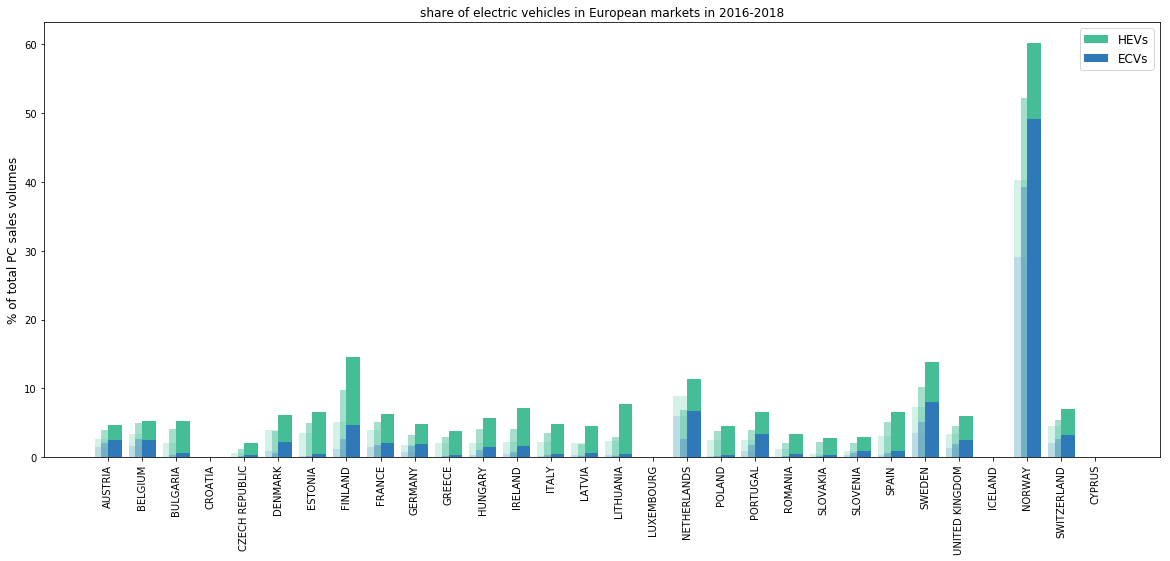

In [509]:
# simple way to get a stacked bar chart: total in the background, partial in the foreground

fig, ax = plt.subplots(figsize = (20, 8))

plt.bar(data['country'], data['% share ecv+hev 2016'], color = '#91ddc5', align = 'edge', alpha = .4, width = -.4) # HEVs+ECVs in the background
plt.bar(data['country'], data['% share ecv 2016'], color = '#92bee4', align = 'edge', alpha = .4, width = -.4) # ECVs only in the foreground

plt.bar(data['country'], data['% share ecv+hev 2017'], color = '#66caaa', align = 'center', alpha = .6, width = .4) # HEVs+ECVs in the background
plt.bar(data['country'], data['% share ecv 2017'], color = '#689dca', align = 'center', alpha = .6, width = .4) # ECVs only in the foreground


plt.bar(data['country'], data['% share ecv+hev 2018'], color = '#45bd97', align = 'edge', width = .4, label = 'HEVs') # HEVs+ECVs in the background
plt.bar(data['country'], data['% share ecv 2018'], color = '#2f79b8', align = 'edge', width = .4, label = 'ECVs') # ECVs only in the foreground

plt.xticks(rotation = 90)

ax.legend(loc = 'best', fontsize = 'large')

ax.set_ylabel('% of total PC sales volumes', fontsize = 'large')
ax.set_title('share of electric vehicles in European markets in 2016-2018')


## Extracting just the five major markets it can be seen how the share of combined ECVs and hybrids is similar in all of them (5-6%),
## but the split between the two kinds varies a lot, Italy being a notable example of a very limited share of ECVs.

Text(0.5,1,'share of electric vehicles in major European markets in 2016-2018')

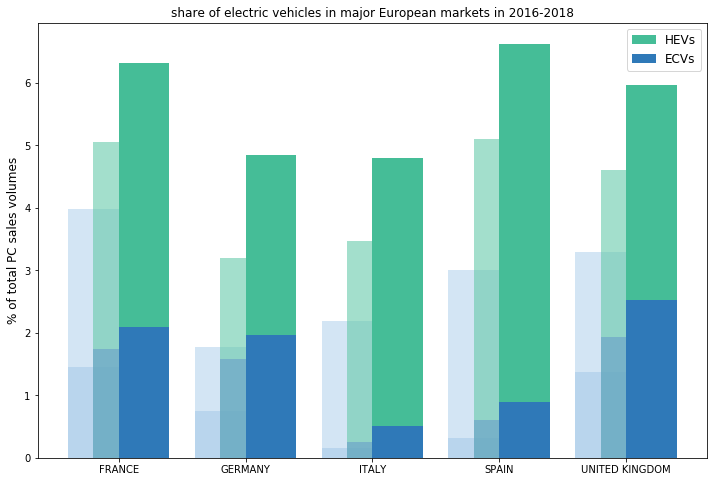

In [510]:
# simple way to get a stacked bar chart: total in the background, partial in the foreground

fig, ax = plt.subplots(figsize = (12, 8))

plt.bar(data_majors['country'], data_majors['% share ecv+hev 2016'], color = '#92bee4', align = 'edge', alpha = .4, width = -.4) # HEVs+ECVs in the background
plt.bar(data_majors['country'], data_majors['% share ecv 2016'], color = '#92bee4', align = 'edge', alpha = .4, width = -.4) # ECVs only in the foreground

plt.bar(data_majors['country'], data_majors['% share ecv+hev 2017'], color = '#66caaa', align = 'center', alpha = .6, width = .4) # HEVs+ECVs in the background
plt.bar(data_majors['country'], data_majors['% share ecv 2017'], color = '#689dca', align = 'center', alpha = .6, width = .4) # ECVs only in the foreground

plt.bar(data_majors['country'], data_majors['% share ecv+hev 2018'], color = '#45bd97', align = 'edge', width = .4, label = 'HEVs') # HEVs+ECVs in the background
plt.bar(data_majors['country'], data_majors['% share ecv 2018'], color = '#2f79b8', align = 'edge', width = .4, label = 'ECVs') # ECVs only in the foreground

ax.legend(loc = 'best', fontsize = 'large')

ax.set_ylabel('% of total PC sales volumes', fontsize = 'large')
ax.set_title('share of electric vehicles in major European markets in 2016-2018')



## ECVs and hybrids shown as actual sales figures compared to the total passenger cars market in the five majors.

Text(0.5,1,'share of electric vehicles in major European markets in 2016-2018')

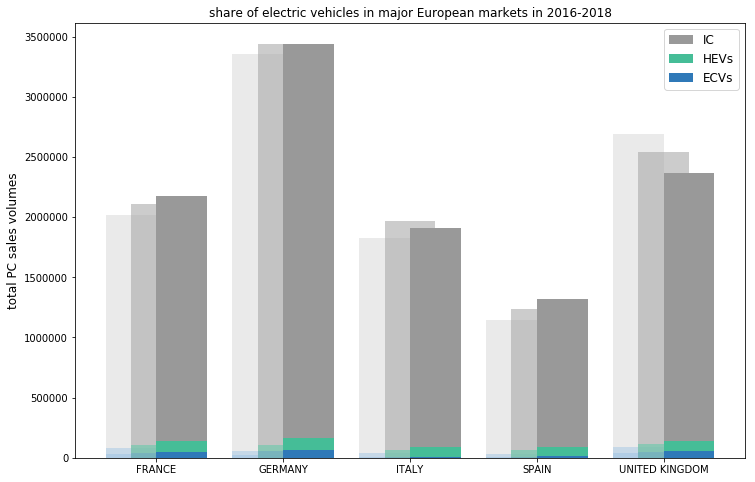

In [508]:
# simple way to get a stacked bar chart: total in the background, partial in the foreground


fig, ax = plt.subplots(figsize = (12, 8))

plt.bar(data_majors['country'], data_majors['passcars 2016'], color = '#cccccc', align = 'edge', alpha = .4, width = -.4) # internal combustion
plt.bar(data_majors['country'], data_majors['ecv 2016']+data_majors['hev 2016'], color = '#92bee4', align = 'edge', alpha = .4, width = -.4) # HEVs+ECVs in the background
plt.bar(data_majors['country'], data_majors['ecv 2016'], color = '#92bee4', align = 'edge', alpha = .4, width = -.4) # ECVs only in the foreground

plt.bar(data_majors['country'], data_majors['passcars 2017'], color = '#aaaaaa', align = 'center', alpha = .6, width = .4) # internal combustion
plt.bar(data_majors['country'], data_majors['ecv 2017']+data_majors['hev 2017'], color = '#66caaa', align = 'center', alpha = .6, width = .4) # HEVs+ECVs in the background
plt.bar(data_majors['country'], data_majors['ecv 2017'], color = '#689dca', align = 'center', alpha = .4, width = .4) # ECVs only in the foreground

plt.bar(data_majors['country'], data_majors['passcars 2018'], color = '#999999', align = 'edge', width = .4, label = 'IC') # internal combustion
plt.bar(data_majors['country'], data_majors['ecv 2018']+data_majors['hev 2018'], color = '#45bd97', align = 'edge', width = .4, label = 'HEVs') # HEVs+ECVs in the background
plt.bar(data_majors['country'], data_majors['ecv 2018'], color = '#2f79b8', align = 'edge', width = .4, label = 'ECVs') # ECVs only in the foreground



ax.legend(loc = 'best', fontsize = 'large')

ax.set_ylabel('total PC sales volumes', fontsize = 'largea')
ax.set_title('share of electric vehicles in major European markets in 2016-2018')



### The beauty of pandas is in its capabilities of doing various operations on groups. For example we can compare the major markets to the others.



'True' stands here for 'is in major_markets', 'False' for 'is not'. In 2018 the sales of ECVs were split almost equally between the 5 biggest markets and all the all the others, but the numbers of hybrid vehicle sales were much higher in the 'majors'.


In [586]:
# True stands for 'is in major_markets', False for 'is not'. In 2018 the sales of ECVs

data.groupby(data['country'].isin(major_markets)).agg({'ecv 2018':'sum', 'hev 2018':'sum', 'ecv 2017':'sum', 'hev 2017':'sum'}).sort_values(by = 'country', ascending  = False)

,ecv 2018,hev 2018,ecv 2017,hev 2017
country,,,,
True,194769,429614,153003,311641
False,189283,176596,136069,144012


In [577]:
grp = data.groupby(data['country'].isin(major_markets)).agg({'ecv 2018':'sum', 'hev 2018':'sum', 'ecv 2017':'sum', 'hev 2017':'sum'}).sort_values(by = 'country', ascending  = False)

Text(0.5,1,'electric vehicles sales 2018')

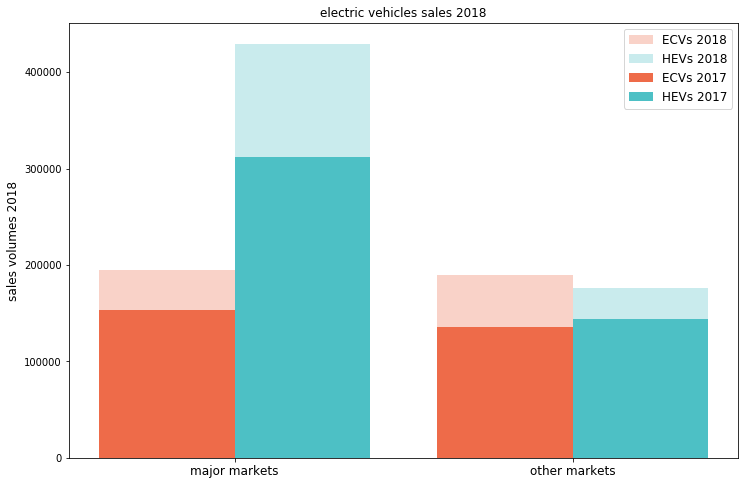

In [589]:
markets = ['major markets', 'other markets']

fig, ax = plt.subplots(figsize = (12,8))

ax.bar(markets, grp['ecv 2018'], label = 'ECVs 2018', color = '#ee6b49', width = -.4, align = 'edge', alpha = .3)
ax.bar(markets, grp['hev 2018'], label = 'HEVs 2018', color = '#4dc0c5', width = .4, align = 'edge', alpha = .3)

ax.bar(markets, grp['ecv 2017'], label = 'ECVs 2017', color = '#ee6b49', width = -.4, align = 'edge')
ax.bar(markets, grp['hev 2017'], label = 'HEVs 2017', color = '#4dc0c5', width = .4, align = 'edge')

ax.legend(fontsize = 'large')
ax.set_xticklabels(labels = markets, fontsize = 'large')
ax.set_ylabel('sales volumes 2018', fontsize = 'large')
ax.set_title('electric vehicles sales 2018')